<a href="https://www.kaggle.com/code/ahmedalmadami/twitter-depression-classification?scriptVersionId=112378040" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Twitter Depression Classification

## The goal of this project is to gather tweets from twitter, process the data, and model the data using our bench mark algorithms; Decision Tree Classifier, Logistic Regression, Classifier, and SGD Classifier to classify whether a tweet is depressed or non depressed. We will then apply advanced techniques such as Cross-Validation, Feature selection, Ensemble Learning, to optimize our models and get a better accuracy score. Our goal is to have our benchmark algorithms produce an accuracy score of arounds ~80%, and ~84% after applying advanced techniques.

### Import Data

In [1]:
#import depessed tweets
import pandas as pd
df = pd.read_csv("/kaggle/input/depression-dataset/clean_d_tweets.csv")
df.head()

,date,tweet,day,hour,nlikes,nreplies,nretweets
0,5/16/2020 1:45,the real reason why you be sad you be attach t...,6,1,13731,219,5642
1,4/29/2020 6:42,my biggest problem be overthinking everything,3,6,12583,98,6951
2,4/29/2020 5:48,the worst sadness be the sadness you have teac...,3,5,13350,51,7168
3,4/29/2020 5:47,i cannot make you understand i cannot make any...,3,5,12926,56,8042
4,9/13/2019 0:52,i do not think anyone really understand how ti...,5,0,21160,111,13344


In [2]:
# import non depessed tweets
df2 = pd.read_csv("/kaggle/input/depression-dataset/clean_non_d_tweets.csv")
df2.head()

,date,tweet,day,hour,nlikes,nreplies,nretweets
0,8/9/2021 5:35,touch pass be the new asmr,1,5,22,3,1
1,8/9/2021 4:36,12 years ago i call my dad and he give me some...,1,4,210,8,14
2,8/9/2021 4:28,there be 6500 languages yet i choose to only s...,1,4,564,14,64
3,8/9/2021 4:05,hey everyone ask for a raise today i be tell y...,1,4,1052,28,74
4,8/8/2021 12:56,i invest in 47 startups in a year here be how ...,7,12,2275,65,277


### Label the depressed and non depressed data

In [3]:
# Add a column to df with the label 0 for depressed tweets
df['label'] = 0
df.head()

,date,tweet,day,hour,nlikes,nreplies,nretweets,label
0,5/16/2020 1:45,the real reason why you be sad you be attach t...,6,1,13731,219,5642,0
1,4/29/2020 6:42,my biggest problem be overthinking everything,3,6,12583,98,6951,0
2,4/29/2020 5:48,the worst sadness be the sadness you have teac...,3,5,13350,51,7168,0
3,4/29/2020 5:47,i cannot make you understand i cannot make any...,3,5,12926,56,8042,0
4,9/13/2019 0:52,i do not think anyone really understand how ti...,5,0,21160,111,13344,0


In [4]:
# Add a column to df2 with the label 1 for non depressed tweets
df2['label'] = 1
df2.head()

,date,tweet,day,hour,nlikes,nreplies,nretweets,label
0,8/9/2021 5:35,touch pass be the new asmr,1,5,22,3,1,1
1,8/9/2021 4:36,12 years ago i call my dad and he give me some...,1,4,210,8,14,1
2,8/9/2021 4:28,there be 6500 languages yet i choose to only s...,1,4,564,14,64,1
3,8/9/2021 4:05,hey everyone ask for a raise today i be tell y...,1,4,1052,28,74,1
4,8/8/2021 12:56,i invest in 47 startups in a year here be how ...,7,12,2275,65,277,1


In [5]:
# Add another column labeled depression to df2 with the value non depressed
df2['depression'] = 'non depressed'

# Add another column labeled depression to df with the value depressed
df['depression'] = 'depressed'

df.head()

,date,tweet,day,hour,nlikes,nreplies,nretweets,label,depression
0,5/16/2020 1:45,the real reason why you be sad you be attach t...,6,1,13731,219,5642,0,depressed
1,4/29/2020 6:42,my biggest problem be overthinking everything,3,6,12583,98,6951,0,depressed
2,4/29/2020 5:48,the worst sadness be the sadness you have teac...,3,5,13350,51,7168,0,depressed
3,4/29/2020 5:47,i cannot make you understand i cannot make any...,3,5,12926,56,8042,0,depressed
4,9/13/2019 0:52,i do not think anyone really understand how ti...,5,0,21160,111,13344,0,depressed


### Merge the two DataFrames for Analysis

In [6]:
# Concatenate df and df2
df3 = pd.concat([df, df2], axis=0)
df3.head()

,date,tweet,day,hour,nlikes,nreplies,nretweets,label,depression
0,5/16/2020 1:45,the real reason why you be sad you be attach t...,6,1,13731,219,5642,0,depressed
1,4/29/2020 6:42,my biggest problem be overthinking everything,3,6,12583,98,6951,0,depressed
2,4/29/2020 5:48,the worst sadness be the sadness you have teac...,3,5,13350,51,7168,0,depressed
3,4/29/2020 5:47,i cannot make you understand i cannot make any...,3,5,12926,56,8042,0,depressed
4,9/13/2019 0:52,i do not think anyone really understand how ti...,5,0,21160,111,13344,0,depressed


### Data Pre-Processing

In [7]:
# check to see if the data is balanced
df3['label'].value_counts()

0    3082
1    3082
Name: label, dtype: int64

In [8]:
# check for missing values
df3.isnull().sum()

date           0
tweet         23
day            0
hour           0
nlikes         0
nreplies       0
nretweets      0
label          0
depression     0
dtype: int64

In [9]:
# drop missing values
df3.dropna(inplace=True)

### TF-IDF 

In [10]:
# Use the TfidfVectorizer to convert the text to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,1))
# tfidf is used to convert the text to a matrix of TF-IDF features
# this is done because the machine learning model cannot work with text directly

# Fit and transform the vectorizer on the text
tfidf.fit(df3['tweet'])
text = tfidf.transform(df3['tweet'])

### TF-IDF allows us to see which words are most important to a document in a collection. It is often used as a weighting factor in information retrieval and text mining. In this case, we will use it to see which words are most important to a tweet in our dataset. This will help us see which words are most important to a depressed tweet and which words are most important to a non depressed tweet.

### By evaluating TF-IDF or a number of “the words used in a sentence vs words used in overall tweet”, we understand - how useful a word is to a sentence (which helps us understand the importance of a word in a sentence). How useful a word is to a tweet (which helps us understand the important words with more frequencies in a tweet). This also helps us ignore words that are misspelled (using n-gram technique,) which occurs alot in tweets

### Begin applying ML Models

In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
# X = text and y = label
X_train, X_test, y_train, y_test = train_test_split(text, df3['label'], test_size=0.2, random_state=42)

### Decision Tree Classifier

Accuracy:  0.7371847030105777
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       635
           1       0.77      0.65      0.71       594

    accuracy                           0.74      1229
   macro avg       0.74      0.73      0.73      1229
weighted avg       0.74      0.74      0.74      1229



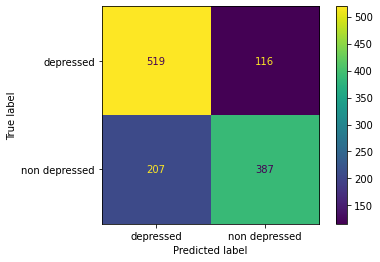

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = dtree.predict(X_test)
score = dtree.score(X_test, y_test)
print("Accuracy: ", score)


# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# Print the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['depressed', 'non depressed'])
disp.plot()

### Logistic Regression Classifier

Accuracy: 0.822620016273393
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       635
           1       0.79      0.86      0.82       594

    accuracy                           0.82      1229
   macro avg       0.82      0.82      0.82      1229
weighted avg       0.82      0.82      0.82      1229



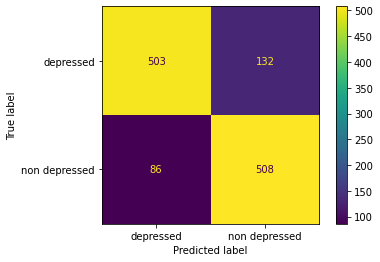

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict on the test set and calculate the accuracy
y_pred2 = lr.predict(X_test)
score2 = accuracy_score(y_test, y_pred2)
print("Accuracy:", score2)

# Print the classification report
print(classification_report(y_test, y_pred2))

# Print the confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['depressed', 'non depressed'])
disp2.plot()

### SGD Classifier

Accuracy: 0.8136696501220505
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       635
           1       0.82      0.79      0.80       594

    accuracy                           0.81      1229
   macro avg       0.81      0.81      0.81      1229
weighted avg       0.81      0.81      0.81      1229



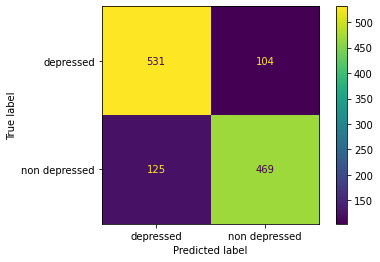

In [14]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

# Predict on the test set and calculate the accuracy
y_pred3 = sgd.predict(X_test)
score3 = accuracy_score(y_test, y_pred3)
print("Accuracy:", score3)

# Print the classification report
print(classification_report(y_test, y_pred3))

# Print the confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['depressed', 'non depressed'])
disp3.plot()